In [23]:
import pandas as pd
import numpy as np
begin = 2016
end = 2020
n = end-begin+1
tmp = pd.read_csv(f"EICIO/2020.csv",header=[0,1],index_col=[0,1])
EE = np.zeros((1064,1064))
for year in range(begin,end+1):
    EE += pd.read_csv(f"EICIO/{year}.csv",header=[0,1],index_col=[0,1]).values
EE /= n
EE = pd.DataFrame(EE, index=tmp.index,columns=tmp.columns)

In [24]:
cnt=0
c_name = []
for elem in EE.columns:
    cnt+=1
    if cnt%14==0:
        c_name.append(list(elem)[0])
del cnt

In [25]:
DOE = pd.DataFrame(np.zeros((1064,1064)),index=EE.index,columns=EE.columns)
IME = pd.DataFrame(EE.values.copy(),index=EE.index,columns=EE.columns)
for i in range(76):
    DOE.iloc[i*14:i*14+14,i*14:i*14+14] = EE.iloc[i*14:i*14+14,i*14:i*14+14]
    IME.iloc[i*14:i*14+14,i*14:i*14+14] = 0

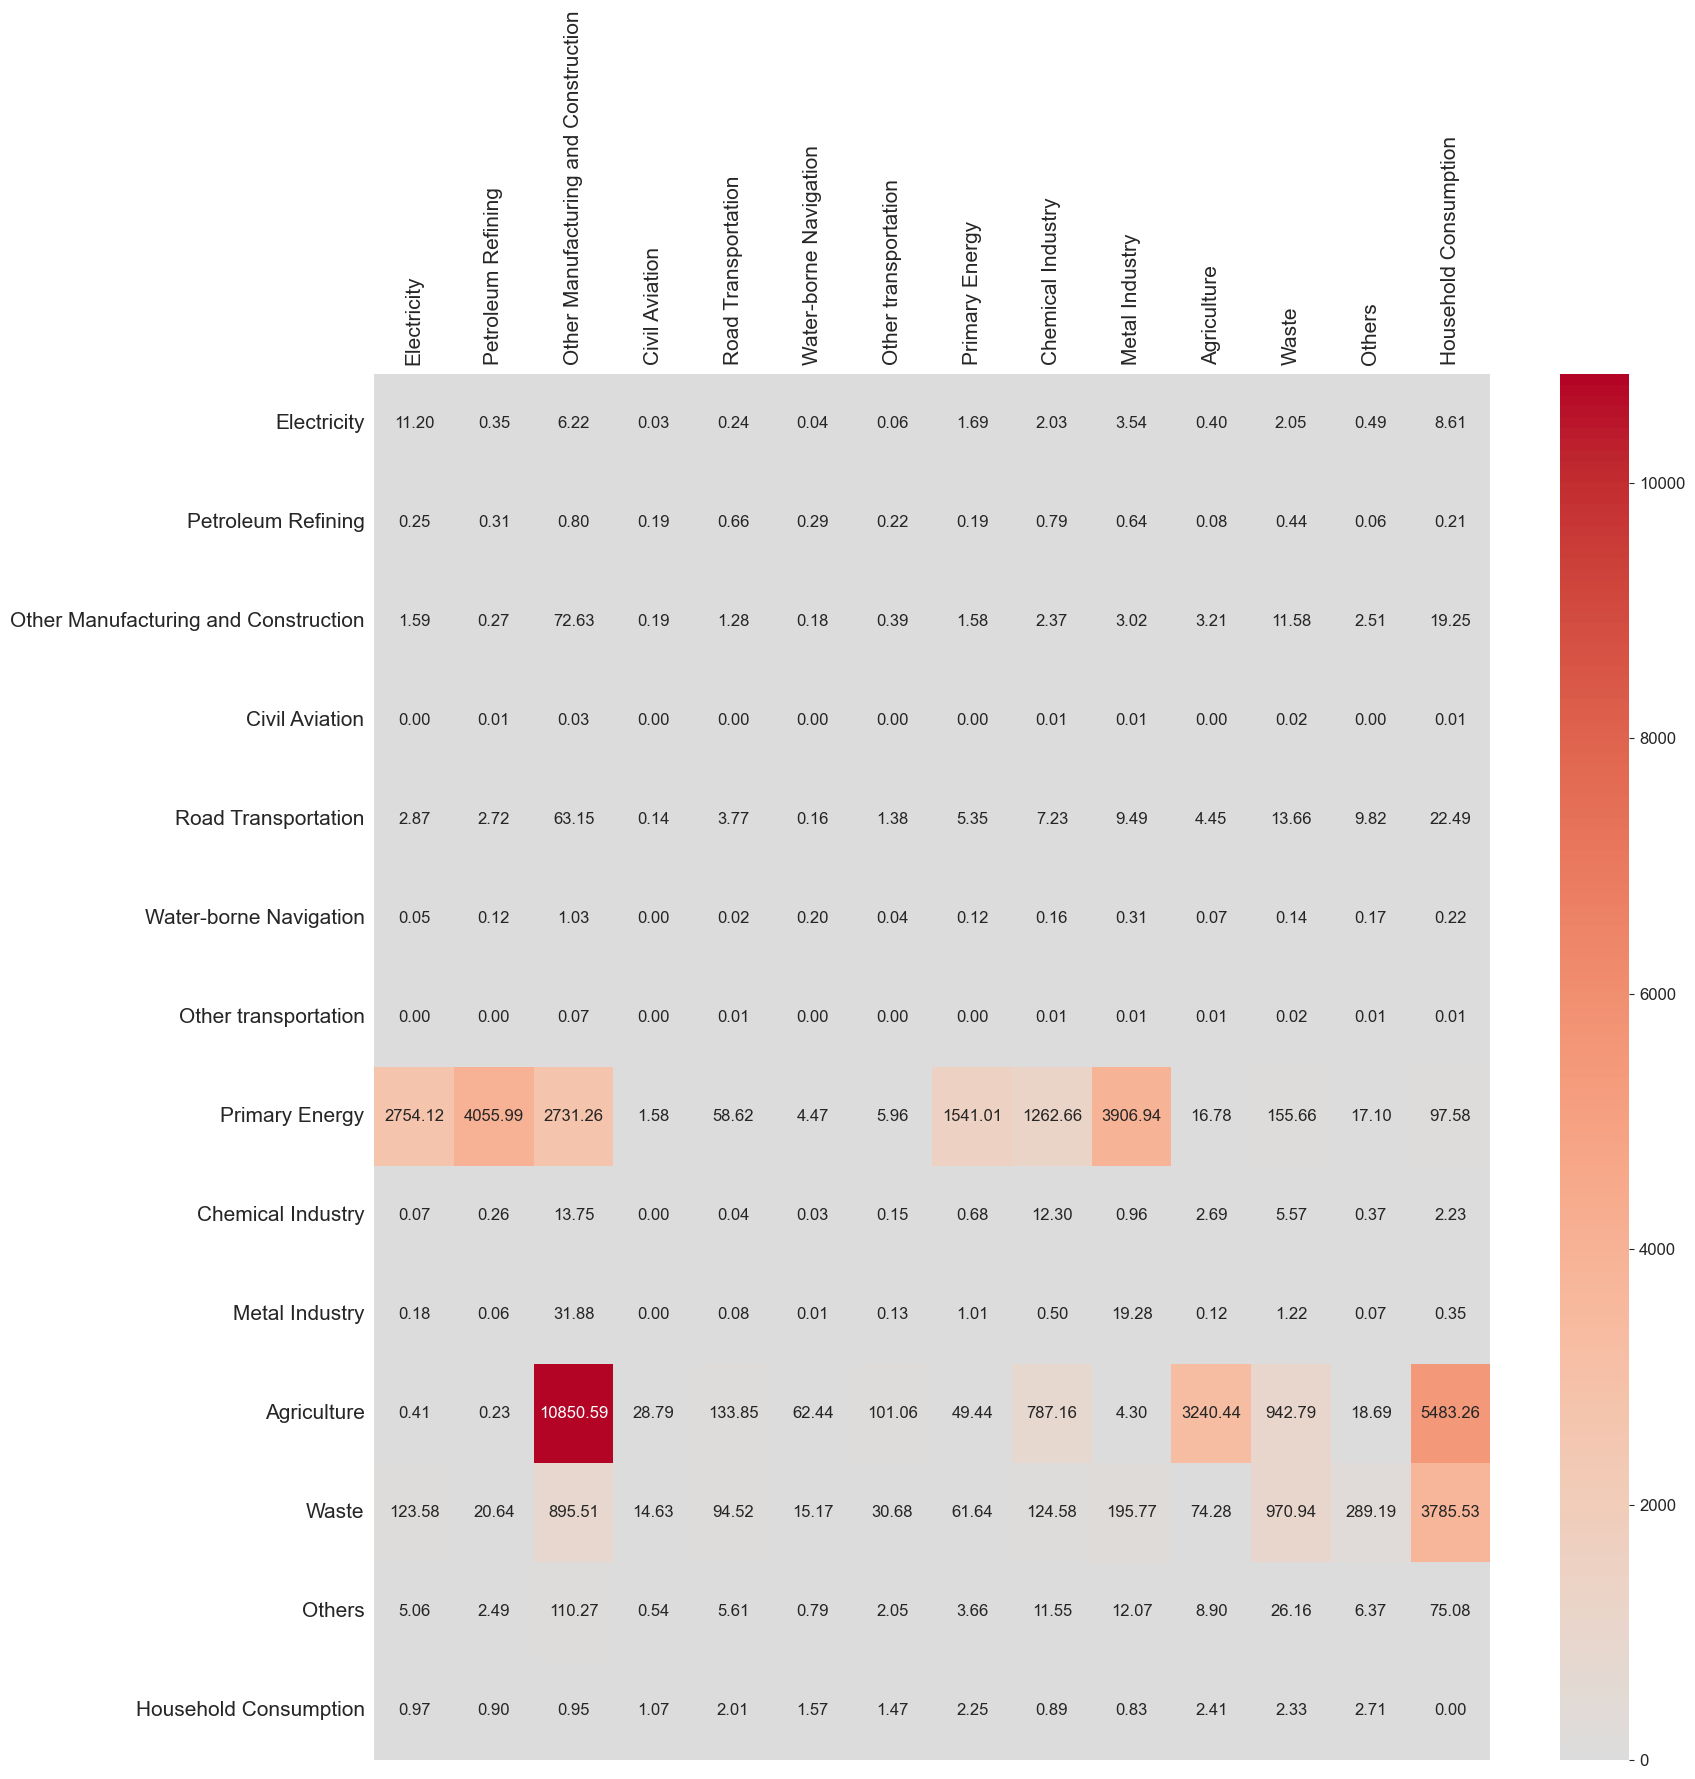

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# labels = ["Electricity",
#           "Petroleum Refining",
#           "Other Manufacturing and Construction",
#           "Civil Aviation",
#           "Road Transportation",
#           "Water-borne Navigation",
#           "Other transportation",
#           "Primary Energy",
#           "Chemical Industry",
#           "Metal Industry",
#           "Agriculture",
#           "Waste",
#           "Others",
#           "Household Consumption"]
# plt.style.use("ggplot")
# sns.set_style("whitegrid")
# plt.subplots(figsize = (18,18))
# ax = sns.heatmap(DOE.loc['CHN','CHN'].values, cmap="coolwarm",annot=True,center=0,fmt=".2f",yticklabels=labels,xticklabels=labels,annot_kws={'size':12})
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=12)

In [246]:
# IMP = np.zeros((76,76))
# for i in range(76):
#     for j in range(76):
#         if i!=j:
#             IMP[i][j] = EE.iloc[i*14:i*14+14,j*14:j*14+14].sum().sum()
# IMP = pd.DataFrame(IMP, index=c_name,columns=c_name)
# IMP.to_csv(f"IMP/{year}.csv")

# DFM Method

In [3]:
def CalculateG(A1,Y1,X1,E1):
    n = A1.shape[0]
    A = A1.copy()
    DataLD = {}
    for s in range(n):
        if X1[s]!= 0:
            A[:,s]=A[:,s]/X1[s]
            
    for s in range(20):
        L= np.dot(E1,np.dot(A,np.diag(np.dot(np.linalg.matrix_power(A,s),Y1))))
        # LD = L - np.diag(np.diag(L))
        LD = L
        # for i in range(70):
            # LD[i*13:(i+1)*13,i*13:(i+1)*13] = 0
        DataLD[s+1]=LD
    for s in range(1,1000):
        LD=DataLD[s]
        if np.sum(LD)<1e-16:
            k=s
            break
    print(k)
    F1=0
    for s in range(1,k): 
        LD=DataLD[s]
        S=np.sum(LD)/(n**2)
        F1=F1+S
    F1=F1/k

    # print(F1)

    DataW = {}
    for s in range(1,k):
        LD=DataLD[s]
        W = np.zeros(LD.shape)
        for i in range(0,n):
            for j in range(0,n):
                if(LD[i,j]>=F1):
                    W[i,j]=1
        # print(np.sum(W))
        DataW[s]=W
    D=np.zeros((n,n))

    for s in range(1,k):
        W=DataW[s]
        D=W+D
    E1=D/k
    F2=np.sum(E1)/(n**2)
    # print(F2)
    F = np.zeros(E1.shape)
    G = np.zeros(E1.shape)
    for i in range(0,n):
        for j in range(0,n):
            if(E1[i,j]>=F2):
                F[i,j]=1
    G = F + F.T
    return G

In [170]:
A=np.zeros((1064,1064))
X=np.zeros((1,1064))
DE=np.zeros((1,1064))
Y=np.zeros((1,1064))
for year in range(begin,end+1):
    A += pd.read_csv(f"A/{year}.csv",header=[0,1],index_col=[0,1]).values
    X += pd.read_csv(f"X/{year}.csv",index_col=[0],header=[0,1]).values
    DE += pd.read_csv(f"DE/{year}.csv",index_col=[0],header=[0,1]).values
    Y += pd.read_csv(f"Y/{year}.csv",index_col=[0],header=[0,1]).values
A /= n
X /= n
DE /= n
Y /= n
X=X.reshape(1064,)
DE = DE.reshape(1064,)
Y = Y.reshape(1064,)
G = CalculateG(A,Y,X,np.diag(DE))

6


In [ ]:
# import pandas as pd
# import numpy as np

# IMP = pd.DataFrame(np.zeros((76,76)),index=c_name,columns=c_name)
# year = 2020
# EE = pd.read_csv(f"EICIO/{year}.csv",header=[0,1],index_col=[0,1])
# DOE = pd.DataFrame(np.zeros((1064,1064)),index=EE.index,columns=EE.columns)
# IME = pd.DataFrame(EE.values.copy(),index=EE.index,columns=EE.columns)
# for i in range(76):
#     DOE.iloc[i*14:i*14+14,i*14:i*14+14] = EE.iloc[i*14:i*14+14,i*14:i*14+14]
#     IME.iloc[i*14:i*14+14,i*14:i*14+14] = 0
# A = pd.read_csv(f"A/{year}.csv",header=[0,1],index_col=[0,1]).values
# X = pd.read_csv(f"X/{year}.csv",index_col=[0],header=[0,1]).values
# DE = pd.read_csv(f"DE/{year}.csv",index_col=[0],header=[0,1]).values
# Y = pd.read_csv(f"Y/{year}.csv",index_col=[0],header=[0,1]).values
# X=X.reshape(1064,)
# DE = DE.reshape(1064,)
# Y = Y.reshape(1064,)
# G = CalculateG(A,Y,X,np.diag(DE))
# select = np.zeros(EE.shape)
# for i in range(1064):
#     for j in range(i):
#         if G[i][j]==2:
#             select[i][j]=EE.values[i][j]
#             select[j][i]=EE.values[j][i]
# select = pd.DataFrame(select,index=EE.columns, columns=EE.columns)
# ee_D = {}
# for i in range(1064):
#     for j in range(1064):
#         ee_D[(DOE.columns[i],EE.columns[j])]=DOE.values[i][j]
# ee_I = {}
# for i in range(1064):
#     for j in range(1064):
#         ee_I[(IME.columns[i],EE.columns[j])]=IME.values[i][j]
# for (i,j),e in sorted(ee_D.items(),key=lambda d: d[1], reverse=True)[:40]:
#     select.loc[i,j]=e
# for (i,j),e in sorted(ee_I.items(),key=lambda d: d[1], reverse=True)[:40]:
#     select.loc[i,j]=e
# for i in range(76):
#     select.iloc[i*14:i*14+14,i*14:i*14+14] = 0
# for i in range(76):
#     for j in range(76):
#         IMP.iloc[i,j] = select.iloc[i*14:i*14+14,j*14:j*14+14].sum().sum() 
# IMP.to_csv(f"IMP/s{year}.csv")

6


# Key pathway select

In [171]:
select = np.zeros(EE.shape)
for i in range(1064):
    for j in range(i):
        if G[i][j]==2:
            select[i][j]=EE.values[i][j]
            select[j][i]=EE.values[j][i]
select = pd.DataFrame(select,index=EE.columns, columns=EE.columns)

In [172]:
ee_D = {}
for i in range(1064):
    for j in range(1064):
        ee_D[(DOE.columns[i],EE.columns[j])]=DOE.values[i][j]
ee_I = {}
for i in range(1064):
    for j in range(1064):
        ee_I[(IME.columns[i],EE.columns[j])]=IME.values[i][j]
for (i,j),e in sorted(ee_D.items(),key=lambda d: d[1], reverse=True)[:40]:
    select.loc[i,j]=e
for (i,j),e in sorted(ee_I.items(),key=lambda d: d[1], reverse=True)[:40]:
    select.loc[i,j]=e
tmp = 0
for i in range(76):
    tmp+=select.iloc[i*14:i*14+14,i*14:i*14+14].sum().sum()
tmp, select.sum().sum()-tmp

(np.float64(139208.5495899674), np.float64(9148.887954732112))

In [15]:
# ee_D = {}
# for i in range(1064):
#     for j in range(1064):
#         ee_D[(DOE.columns[i],EE.columns[j])]=DOE.values[i][j]
# results = []
# for (o, t), e in sorted(ee_D.items(),key=lambda d: d[1], reverse=True)[:100]:
#     results.append([o,t,e])
# pd.DataFrame(results).to_csv("tmp.csv")
# del results

In [250]:
ee_I = {}
for i in range(1064):
    for j in range(1064):
        ee_I[(IME.columns[i],EE.columns[j])]=IME.values[i][j]
sorted(ee_I.items(),key=lambda d: d[1], reverse=True)[:20]
results = []
for (o, t), e in sorted(ee_I.items(),key=lambda d: d[1], reverse=True)[:40]:
    results.append([o,t,e])
pd.DataFrame(results).to_csv("tmp.csv")
del results

In [154]:
ee_D = {}
for i in range(1064):
    for j in range(1064):
        ee_D[(DOE.columns[i],EE.columns[j])]=DOE.values[i][j]
ee_I = {}
for i in range(1064):
    for j in range(1064):
        ee_I[(IME.columns[i],EE.columns[j])]=IME.values[i][j]
for (i,j),e in sorted(ee_D.items(),key=lambda d: d[1], reverse=True)[:40]:
    select.loc[i,j]=e
for (i,j),e in sorted(ee_I.items(),key=lambda d: d[1], reverse=True)[:40]:
    select.loc[i,j]=e

# predict emission intensity in 2030

In [ ]:

from scipy import optimize
from sklearn import metrics
from scipy import stats
import pandas as pd
import numpy as np
def func1(x,a,b,c):
    return a*np.pow(b,c*x)

In [30]:
de = []
de_c = ("MEX",'11')
for year in range(2000,2021):
    de.append(pd.read_csv(f"DE/{year}.csv",index_col=[0],header=[0,1]).loc[:,de_c].values[0])
x = range(1,22)
popt , pcov = optimize.curve_fit(func1,x,de)
de_p = func1(x,popt[0],popt[1],popt[2]) 
if (metrics.r2_score(de,de_p)>0.7):
    print(metrics.r2_score(de,de_p), de[-1],func1(32,popt[0],popt[1],popt[2]))
    print(popt[0])
    print(popt[1])
    print(popt[2])
else:
    print(de[-1],min(de[-5:]),metrics.r2_score(de,de_p))

0.7781976600606758 0.0476702842825353 0.03339676528580538
0.06785738227912418
0.9875858635788255
1.7735312351305388


In [50]:
tc = []
tc_c1 = ("IDN",8)
tc_c2 = ('CHN','1')
for year in range(2000,2021):
    tc.append(pd.read_csv(f"A/{year}.csv",index_col=[0,1],header=[0,1]).loc[tc_c1,tc_c2])
popt , pcov = optimize.curve_fit(func1,x,tc)
tc_p = func1(x,popt[0],popt[1],popt[2]) 
if (metrics.r2_score(tc,tc_p)>0.7 and func1(32,popt[0],popt[1],popt[2])<tc[-1]):
    print(tc[-1],func1(32,popt[0],popt[1],popt[2]),metrics.r2_score(tc,tc_p))
    print(popt[0])
    print(popt[1])
    print(popt[2])
else:
    print(tc[-1],min(tc[-5:]),metrics.r2_score(tc,tc_p))
    print(popt[0])
    print(popt[1])
    print(popt[2])
    print("s")

0.0299309895852581 0.0159766209836753 0.7640105957341647
0.0032868455597505684
0.8284342803215984
-0.5695147540412646
s


In [7]:
import pandas as pd
import numpy as np
DE = pd.read_csv("DE/1.csv",index_col=[0,1])
A = pd.read_csv("A/1.csv",index_col=[0,1],header=[0,1])
X = pd.read_csv("X/1.csv",index_col=[0,1])